# A Gentle Introduction to Markov Decision Processes (MDPs)

### Contents

- Motivation

- Preliminary: Markov Processes

- Markov Decision Processes

## First off, who is this Markov guy?

Andrey Markov (1856-1922) was a Russian mathematician who developed the idea of Markov Processes (also called Markov chains). 

He used this idea to model how vowels and constants are structured ([alliteration](https://en.wikipedia.org/wiki/Alliteration)) in Russian literature.

<div align="center"> 
<img src="images/Andrey_Markov_portrait.png"/>
</div>

## Motivation

Consider the following problems,

- **Autonomous driving**: How can you navigate from A to B in traffic in minimum time?

- **Stragetic Games**: How can you win at a game of Chess/Go?

- **Inspection and Maintenance**: How can we plan inspection and maintenance of deteriorating structures like aeroplanes/buildings?

What do they have in common? 

**Decision Making Under Uncertainty**. 

Intuitively, this refers to acting in an uncertain/stochastic environment (and potentially with limited observability) in order to achieve the desired goal. 

Within this realm, we have 

- **Single-step decision making**, which involves making a single decision 

    Examples: Buying a lottery ticket or hiring a new employee 

- **Sequential decision making**, which involves making a sequence of decisions in order to achieve the desired goal.

    Examples: *try to think of examples other than the ones we saw earlier*

Here, we focus on the latter case of sequential decision making since it encompasses the former case.

In the context of decision making under uncertainty, we distinguish between

**Transition uncertainty**: uncertainties arising from the stochastic environment in which we must make decisions

- Mathematical framework: **Markov Decision Processes** (**MDPs**)

**State uncertainty**: uncertainty about our state arising from partial/noisy observations of the environment. 

- Mathematical framework: **Partially Observable Markov Decision Processes** (**POMDPs**)

## Markov Chains

A Markov chain is a special type of random process (also called stochastic process) that satisfies the **Markov property**:

- Given the current state, the the next state is independent of the previous states. 

Mathematically, $\mathbb{P}(s_{t+1} | s_{t}) = \mathbb{P}(s_{t+1} | s_{t}, s_{t-1}, s_{t-2}, \ldots)$, where $s_t$ denotes the state of the process at time instant $t$.

### Example: Hacking Coin Tossing

We know that for a fair coin, the probability of head 'H' and tail 'T' are equal. 

Mathematically, $\mathbb{P}(H) = \mathbb{P}(T) = 0.5$.

<div align="center"> 
<img src="images/dalle.png"/>
</div>

**Objective** :
Teach a robot how to rig the flip such that you consistently get the outcome you desire. 

To save resetting time, you make sure that the flipped coin lands back in the robot's hand and the next flip begins with the previous outcome.



After a lot of training, you note that when you flip with 

- H facing up, probability of getting H again is $0.8$ and probability of getting T is $0.2$.

- T facing up, probability of getting T again is $0.7$ and probability of getting H is $0.3$.

Note that the probabilities still add up to 1 in each case.

We illustrate the outcome of a flip as follows:

<div align="center"> 
<img src="images/transition.png"/>
</div>

Here, the arrows indicate the transition of going from the initial state to the next state and number above indicates the respective probability.

For convinience, we will call the outcome of a flip as the *state* of the coin and denote it by $s_t$, where the subscript $t$ denotes the time instant. The state $s_t$ can ofcourse only take one of two values, H or T. The space of possible states is thus given by the state space $\mathcal{S} = \{H, T \}$.

The next code block illustrates how the above coin flip can be simulated

In [208]:
import random

def flip_coin(face):

    if face == 'H':
        return random.choices(['H', 'T'], weights=[0.8, 0.2])
    elif face == 'T':
        return random.choices(['T', 'H'], weights=[0.7, 0.3])
    else:
        print('Invalid entry! Only H or T accepted')

face = 'T'
print(f'Outcome of coin flip: {flip_coin(face)[0]}')

Outcome of coin flip: T


Let us now flip the coin several times in order to generate a sequence of outcomes.

In [219]:
num_flips = 10

outcome = 'H' # or start with 'H'

for i in range(num_flips):
    print(f's_{i}:{outcome}', end='\t')
    outcome = flip_coin(outcome)[0]

s_0:H	s_1:H	s_2:H	s_3:H	s_4:H	s_5:H	s_6:T	s_7:T	s_8:T	s_9:H	

Congratulations, you have generated your first Markov Chain / Markov Process!

This is a Markov chain because it satisfies the **Markov property**:

Given the current state, the next state, is independent of the previous states. 

Mathematically, $\mathbb{P}(s_{t+1} | s_{t}) = \mathbb{P}(s_{t+1} | s_{t}, s_{t-1}, s_{t-2} \ldots)$

Any sequence of outcome generated above is a **Markov process**!

The Markov property is also called 'memorylessness' since if you know the current state, you do not need the entire history of previous states to predict the probabilities over the next state.

We summarise the idea of transition between the states in a transition model (or transition function) $\mathcal{T}(s'|s)$, which denotes the probability of transitioning from the current state $s$ to the next state $s'$. 

Mathematically, we denote this using a matrix as follows:


\begin{equation*}
\mathcal{T}(s'|s) := 
\begin{bmatrix}
 & s'=H & s'=T \\
s=H & 0.8 & 0.2 \\
s=T & 0.3 & 0.7 \\
\end{bmatrix} = 
\begin{bmatrix}
0.8 & 0.2 \\
0.3 & 0.7 \\
\end{bmatrix},
\end{equation*}

where, the entry $0.3$ denotes $\mathbb{P}(s'=H | s=T)$, which is probability of going from state $T$ to $H$. This is simply a formal way for writing the transition probabilites shown in  the image above.

Note that we have dropped the subscript $t$ because the transition probabilites do not change with time (called **stationary** Markov Process).

### Quiz

Q1. Can you think of another example where this is true? (Hint: which processes can be 'memoryless'?)

Q2. Can you think of an example where this is **not** true? (Hint: This is easier than the first one)

You can find another interactive example by Victor Powell [here](https://setosa.io/ev/markov-chains/)

### Stationary Distribution of a Markov process

Now imagine that you play a simple game where heads $H$ implies a win and tails $T$ implies a loss. 

You begin the game with heads $H$ facing up and play several rounds (say 10,000). 

How many times would you win?

In case of a coin being flipped manually, you would expect to win $50 \%$ of the time but what if we use our robot?

To calculate this, we reuse the earlier code block with some modifications, mainly to store the outcome after each flip to count the number of wins.

In [221]:
import numpy as np
import matplotlib.pyplot as plt

In [263]:
num_flips = 10_000 # or 100_000
result = []

num_rounds = 5 # we carry out num_flips num_trials times
store_results = np.zeros((num_flips, num_rounds))

for k in range(num_rounds):
    
    outcome = 'T' # or start with 'T'

    for flip in range(num_flips):
        outcome = flip_coin(outcome)[0]
        
        # win: 1, loss: 0
        result = 1 if outcome == 'H' else 0
        store_results[flip, k] = result

    num_wins = np.sum(store_results, axis=0)[k]

    win_percentage = num_wins*100/num_flips

    print(f'Win percentage in round {k+1}: {win_percentage:.2f}%')

Win percentage in round 1: 60.32%
Win percentage in round 2: 59.41%
Win percentage in round 3: 59.09%
Win percentage in round 4: 60.24%
Win percentage in round 5: 60.98%


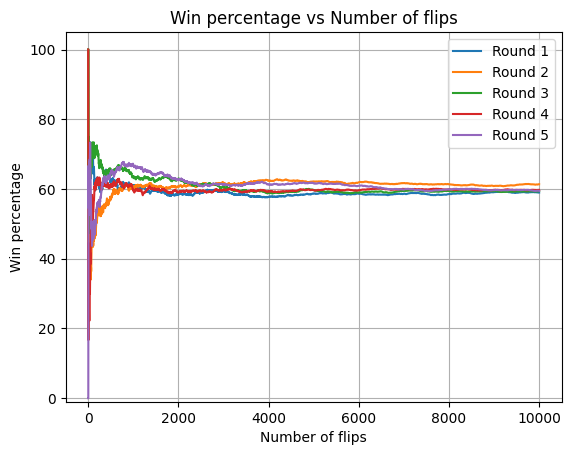

In [738]:
_linspace = np.arange(1, num_flips+1)

for k in range(num_rounds):
    _win_percentage = np.cumsum(store_results[:, k]) / _linspace

    plt.plot(_linspace, _win_percentage*100, label=f'Round {k+1}')

plt.ylim([-1, 105])
plt.title('Win percentage vs Number of flips')
plt.xlabel('Number of flips')
plt.ylabel('Win percentage')
plt.grid()
plt.legend()
plt.show()

With the robot, the new win percentage is close to $60 \%$. (Different runs we have different initial behavior but nonetheless converges to 0.6)

It would result in the same outcome, even if you started with T (try for youself!). 

This is called the *stationary distribution of the Markov chain*. 

In [265]:
# we can also compute the stationary distribution using the transition matrix
transition_matrix = np.array([[0.8, 0.2],
                              [0.3, 0.7]])

head = np.array([[0], [1]])
# tail = np.array([[0], [1]]) # try this

# 1 flip: transition @ head
print(f'Outcome of 1 flip: \n {transition_matrix.T @ head}')

Outcome of 1 flip: 
 [[0.3]
 [0.7]]


In [735]:
# 2 flips: transition @ transition @ head = (transition)^2 @ head
# 3 flips: transition @ transition @ transition @ head = (transition)^3 @ head

num_flips = [1, 2, 4, 8, 30]

print(f'How the transition matrix changes after n flips')

for i in num_flips:

    outcome = np.linalg.matrix_power(transition_matrix.T, i)
    print(f'Number of flips {i}: \n {outcome}')

How the transition matrix changes after n flips
Number of flips 1: 
 [[0.8 0.3]
 [0.2 0.7]]
Number of flips 2: 
 [[0.7  0.45]
 [0.3  0.55]]
Number of flips 4: 
 [[0.625  0.5625]
 [0.375  0.4375]]
Number of flips 8: 
 [[0.6015625  0.59765625]
 [0.3984375  0.40234375]]
Number of flips 30: 
 [[0.6 0.6]
 [0.4 0.4]]


After just $8$ flips, we can observe that we are very close the stationary distribution.

Intuitively, if the robot flipped a coin $8$ times, we expect to get $8^{\text{th}}$ outcome to be H $60\%$ of the time, regardless of which side we start with!

### Eigenvalue problem to find stationary distribution

This is another (more efficient) way to compute the stationary distribution

In [266]:
eig_vals, eig_vecs = np.linalg.eig(transition_matrix.T)

# get eigenvector corresponding to eigenvalue = 1 
idx = np.where(eig_vals==1)[0][0]

# normalise so that sum is 1
stationary_dist = eig_vecs[:, idx]/np.sum(eig_vecs[:, idx])

print(f'Stationary distribution of the Markov chain is: {stationary_dist}')

Stationary distribution of the Markov chain is: [0.6 0.4]


## Markov Decision Process

Recall that a Markov process is defined by the tuple $\langle \mathcal{S}, \mathcal{T} \rangle$, where $\mathcal{S}$ denotes the state space and $\mathcal{T}$ denotes the transition between those states.

A Markov Decision Process is a 5-tuple $\langle \mathcal{S}, \mathcal{A}, \mathcal{T}, \mathcal{R}, \gamma \rangle$, where 

- $\mathcal{S}$ denotes the state space (as before)

- $\mathcal{A}$ is the action space, 

- $\mathcal{T}$ is the transition model (almost the same as before, with some new properties),

- $\mathcal{R}$ is the reward model and 

- $\gamma$ is the discount factor

## Example: Frozen Lake

A humble elf is trying to collect a present that is across a frozen lake but there are some holes along the way as shown in the image below. Falling into the hole causes the game to end. We would like to find the shortest path to the present.

<div align="center"> 
<img src="images/FrozenLake-v1.png"/>
</div>

#### State Space ($\mathcal{S}$)

In this example, the state represents the location of the elf on the 4x4 grid. 

The start state (S) is the upper left corner with coordinates $(0,0)$ and the goal state (G) is the lower right corner with coordinates $(3,3)$. 

The state space has 16 elements and is written as follows,

$$\mathcal{S} := \{ \mathtt{s}^0=(0,0), \mathtt{s}^1=(0,1), \, \mathtt{s}^2=(0,2), \mathtt{s}^3=(0,3), \mathtt{s}^4=(1,0), \ldots, \mathtt{s}^{15}=(3,3) \}.$$

Note that we have used the superscript to count the elements in the state space as we will use the subscript to denote the time, i.e. location at time $t=2$ could for example be $(0,3)$, $s_2=\mathtt{s}^3$. 

#### Action Space ($\mathcal{A}$)

The elf can move in 4 different directions 'Up', 'Down', 'Left' or 'Right'. Bumping into the boundary causes it to remain in the same place. 

We denote the action space as,

$$\mathcal{A} := \{ \mathtt{a}^0=\text{Left}, \mathtt{a}^1=\text{Down}, \mathtt{a}^2=\text{Right}, \mathtt{a}^3=\text{Up} \}$$

Note that we have used the superscript to count the elements in the action space as we will use the subscript to denote the time, i.e. action at time $t=2$ could for example be $\text{Up}$, $a_2=\mathtt{a}^3$. 

#### Transition model ($\mathcal{T}$)

As before, the transition model denotes the probabilities of transitioning between states but now they are also conditional on actions.

**Deterministic setting**

For example, taking action 'Right' in the start state $\mathtt{s}^0=(0,0)$, will result in the elf moving state $\mathtt{s}^1=(0,1)$ (row 0, column 1). Mathematically, 

$$\mathbb{P}(s'=\mathtt{s}^1 | s=\mathtt{s}^0, a=\mathtt{a}^2) = 1.$$ 

Moving into the holes $\mathtt{s}^{5}, \mathtt{s}^{7}, \mathtt{s}^{11}, \mathtt{s}^{12}$ causes the game to end.

**Stochastic setting**

But say there are strong winds towards the north causing the agent to randomly move to tbe cell above instead of the intended square 20% of the time.

For example, in state $\mathtt{s}^8$ when the elf wants to move right but instead moves so state $\mathtt{s}^4$  $20\%$ of the time and moves as intended rest of the time.

Mathematically, 

$$\mathbb{P}(s'=\mathtt{s}^4 | s=\mathtt{s}^8, a=\mathtt{a}^3) = 0.2 \quad \text{and} \quad \mathbb{P}(s'=\mathtt{s}^9 | s=\mathtt{s}^8, a=\mathtt{a}^3) = 0.8.$$ 


<div align="center"> 
<img src="images/FrozenLake-v1.png"/>
</div>

#### Reward model ($\mathcal{R}$)

The reward model defines the distribution of rewards in the MDP and is given as $\mathcal{R}(s, a, s')$. 

It states that we receive reward $r$ after taking action $a$ in state $s$ and moving to state $s'$.

In the above example, we receive a reward of $+1$ when we collect the present at location $\mathtt{s}^{15}=(3,3)$. 

In all other cases we receive $0$ reward. Therefore, we simplfy the reward model to $\mathcal{R}(s)$.

#### Discount factor ($\gamma$)

Discount factor is value between $0$ and $1$ and tells the elf the relative importance of future rewards and motivates the agent to collect rewards as early as possible (similar to [inflation](https://en.wikipedia.org/wiki/Inflation)).

Similar to Markov Processes, an MDP trajectory is a sequence of states, actions and rewards over time

$$s_0, a_0, r_1, s_1, a_1, r_2, s_2, a_2, r_3, \ldots$$ 

(show demonstration)

## Objective

The objective is to find the *shortest* path from start state (S) to goal state (G) and thus would like to know what action to take in each state.

More formally, we are seeking a mapping from states to actions which is called a policy, denoted by $\pi(s): \mathcal{S} \to \mathcal{A}$. 

The policy that provides the shortest path is called the optimal policy $\pi^*(s)$ and is solution to the MDP.

### Quiz: 

Q3. Can you write down the optimal policy for the elf in the Frozen Lake example? Is it unique?

## Takeaways

- **Markov property**: Given the current state, the next state is independent of the previous states. 

- MDPs are a mathematical framework to model decision-making under transition uncertainty.

- An MDP is defined by a state space $\mathcal{S}$, action space $\mathcal{A}$, transition model $\mathcal{T}$, reward model $\mathcal{R}$ and discount factor $\gamma$.

- The solution to an MDP is an optimal policy $\pi^*(s)$ that prescribes the optimal action to take in each state.

# References


Example taken from the official Gym respository: [frozen_lake.py](https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py). 
Brockman, G.. OpenAI Gym. arXiv (2016). https://arxiv.org/pdf/1606.01540.pdf

Kochenderfer, Decision Making Under Uncertainty: Theory and Application.

Kaelbling, L. P., Littman, M. L. & Cassandra, A. R. Planning and acting in partially observable stochastic domains. Artificial Intelligence 101, 99–134 (1998).

Richard S. Sutton & Andrew G. Barto. Reinforcement learning : an introduction. (2020)
